In [ ]:
import pandas as pd

splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/SetFit/bbc-news/" + splits["train"], lines=True)
df_test = pd.read_json("hf://datasets/SetFit/bbc-news/" + splits["test"], lines=True)

df.head()

In [ ]:
print("--- Training Dataset Information ---")
print(f"Number of records (rows): {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("Columns:", df.columns.tolist())
#print("\nFirst 5 rows of training data:")
#print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Test Dataset Information ---")
print(f"Number of records (rows): {len(df_test)}")
print(f"Number of columns: {len(df_test.columns)}")
print("Columns:", df_test.columns.tolist())
#print("\nFirst 5 rows of test data:")
#print(df_test.head().to_markdown(index=False, numalign="left", stralign="left"))

In [ ]:
import numpy as np

# Additional Data Validation Example: Check for unexpected label values
expected_labels = df['label'].unique()
if not np.array_equal(np.sort(expected_labels), np.array([0, 1, 2, 3, 4])):
    print(f"Warning: Unexpected label values found in training data: {expected_labels}")

expected_labels_test = df_test['label'].unique()
if not np.array_equal(np.sort(expected_labels_test), np.array([0, 1, 2, 3, 4])):
    print(f"Warning: Unexpected label values found in test data: {expected_labels_test}")
else:
    print("Label values in training and test data are as expected (0-4).")

#Tisztítás

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get English stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Remove stopwords and split into words
    words = [word for word in text.split() if word not in stop_words]
    # Join words back into a string
    return ' '.join(words)

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the DataFrame with the new cleaned_text column
df.head()

#EDA

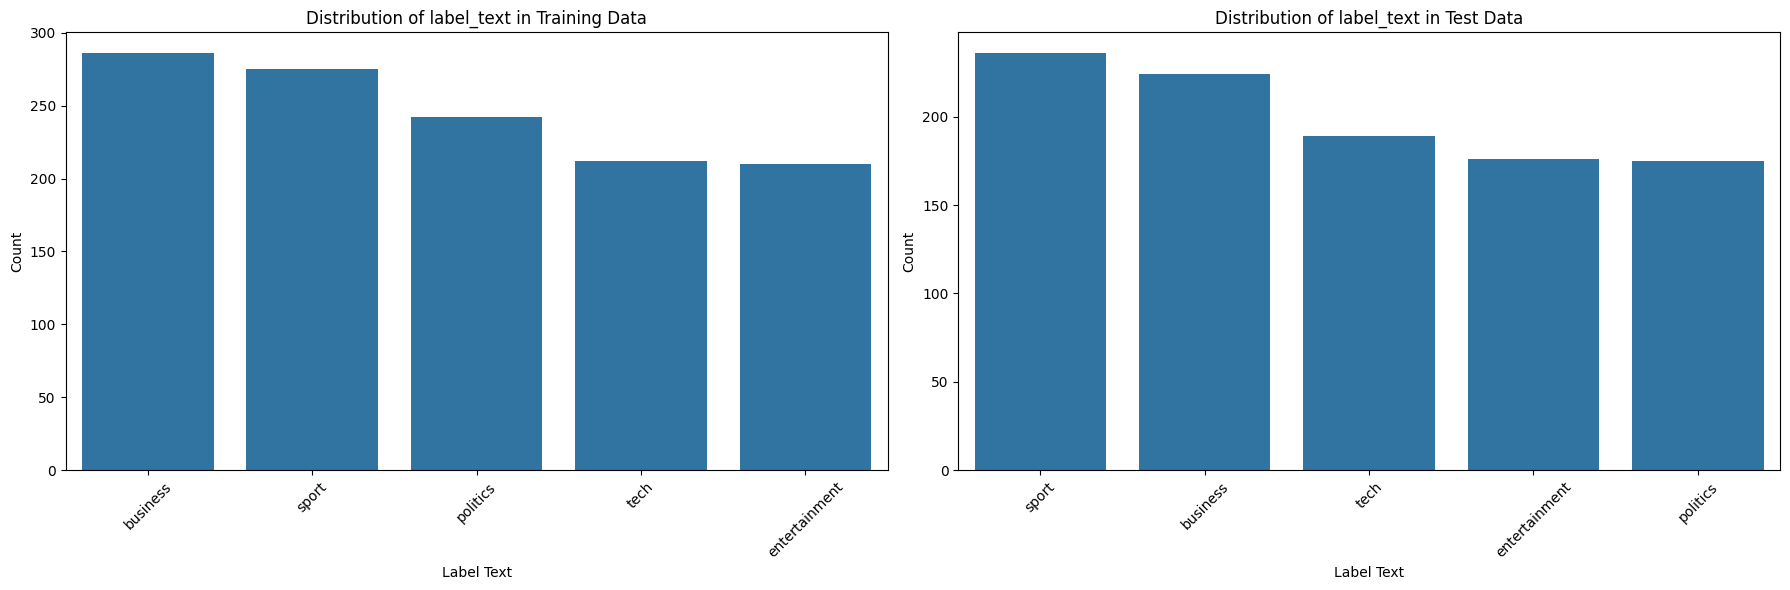

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for 'label_text' in training data
train_label_distribution = df['label_text'].value_counts()

# Calculate value counts for 'label_text' in test data
test_label_distribution = df_test['label_text'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot distribution for training data
sns.barplot(x=train_label_distribution.index, y=train_label_distribution.values, ax=axes[0])
axes[0].set_title('Distribution of label_text in Training Data')
axes[0].set_xlabel('Label Text')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot distribution for test data
sns.barplot(x=test_label_distribution.index, y=test_label_distribution.values, ax=axes[1])
axes[1].set_title('Distribution of label_text in Test Data')
axes[1].set_xlabel('Label Text')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping titles or labels
plt.tight_layout()

# Display the plots
plt.show()

In [67]:
print("\n--- Training DataFrame Information ---")
df.info()
print("\nMissing values in training DataFrame (df):\n", df.isnull().sum())

print("\n--- Test DataFrame Information ---")
df_test.info()
print("\nMissing values in test DataFrame (df_test):\n", df_test.isnull().sum())

--- Training DataFrame Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          1225 non-null   object
 1   label         1225 non-null   int64 
 2   label_text    1225 non-null   object
 3   cleaned_text  1225 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.4+ KB


Missing values in training DataFrame (df):
 text            0
label           0
label_text      0
cleaned_text    0
dtype: int64

--- Test DataFrame Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1000 non-null   object
 1   label       1000 non-null   int64 
 2   label_text  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


Missing values in test DataFrame (df_test):
 text          0
label         0
label_text    0
dtype: int64

In [ ]:
from collections import Counter

# Combine all cleaned text into a single string
all_cleaned_text = ' '.join(df['cleaned_text'].tolist())

# Split the combined text into words
words = all_cleaned_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

print("Top 20 Most Frequent Words:")
for word, count in top_20_words:
    print(f"'{word}': {count}")

/tmp/ipython-input-3882176749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


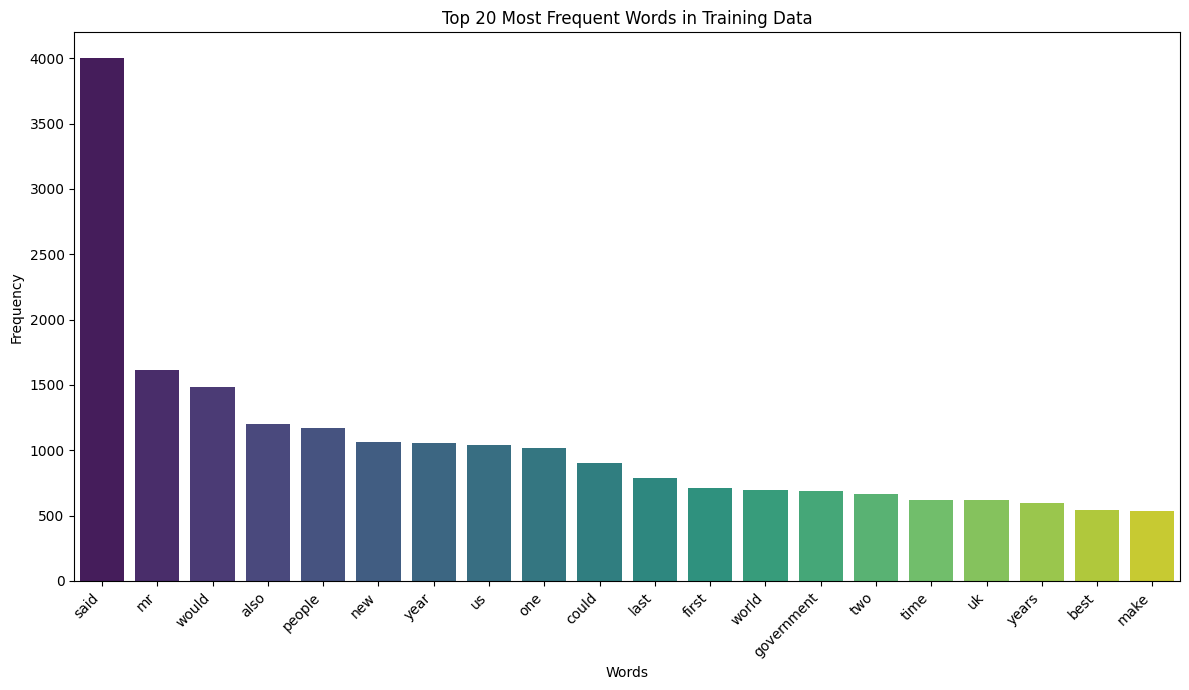

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
words_plot = [word for word, count in top_20_words]
counts_plot = [count for word, count in top_20_words]

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=words_plot, y=counts_plot, palette='viridis')
plt.title('Top 20 Most Frequent Words in Training Data')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

/tmp/ipython-input-1618330453.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


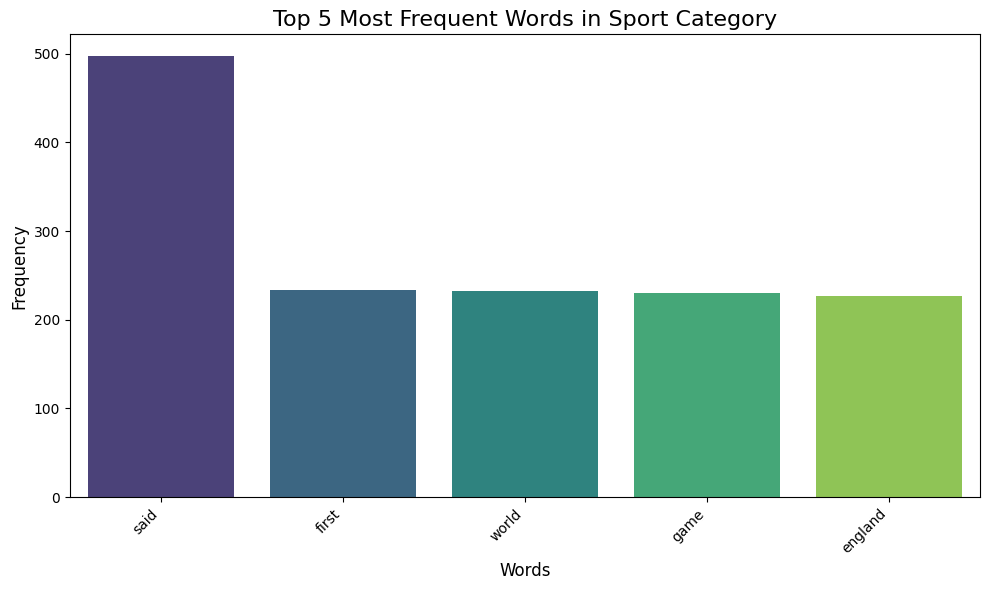

/tmp/ipython-input-1618330453.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


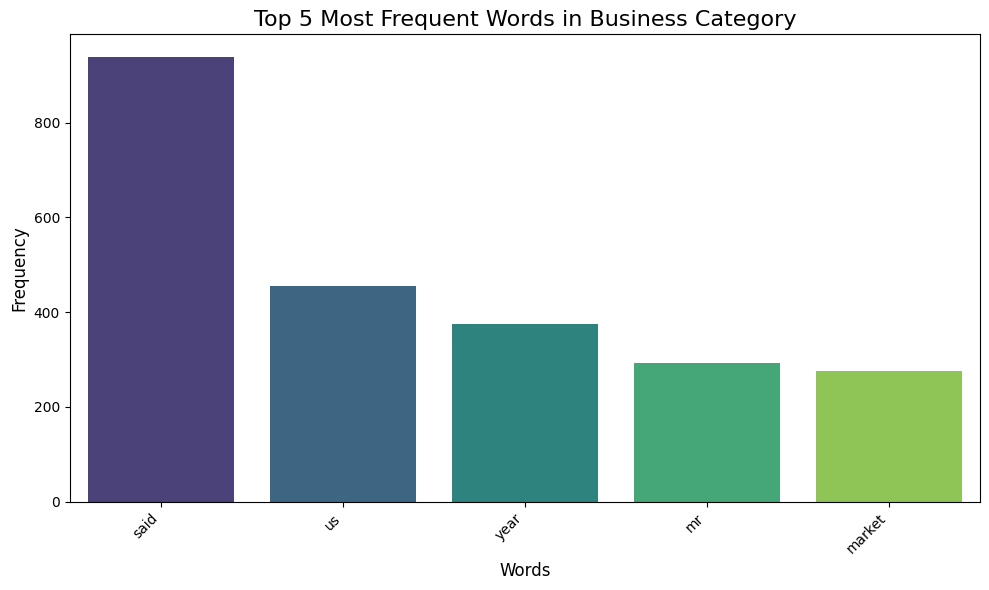

/tmp/ipython-input-1618330453.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


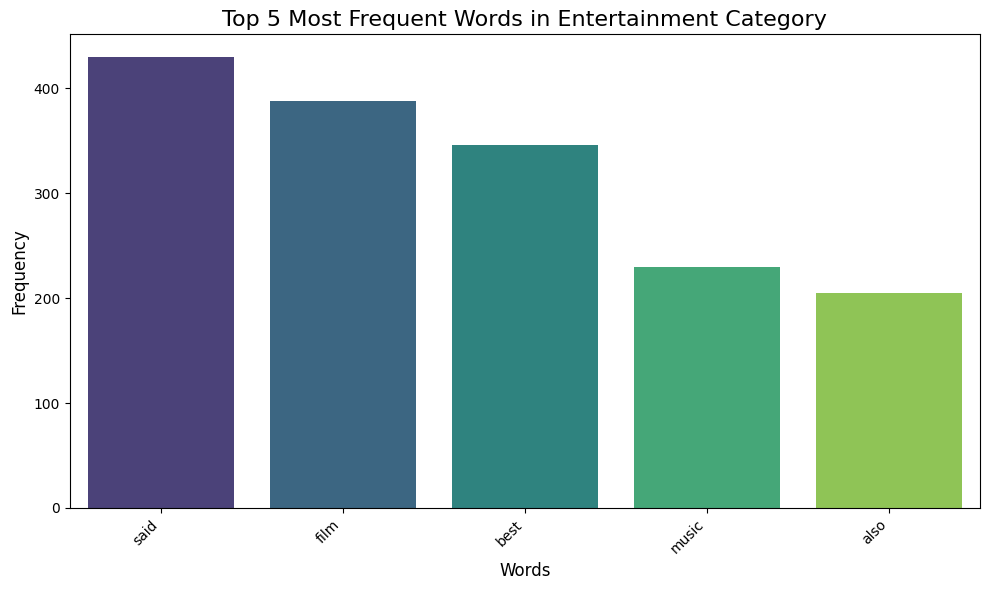

/tmp/ipython-input-1618330453.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


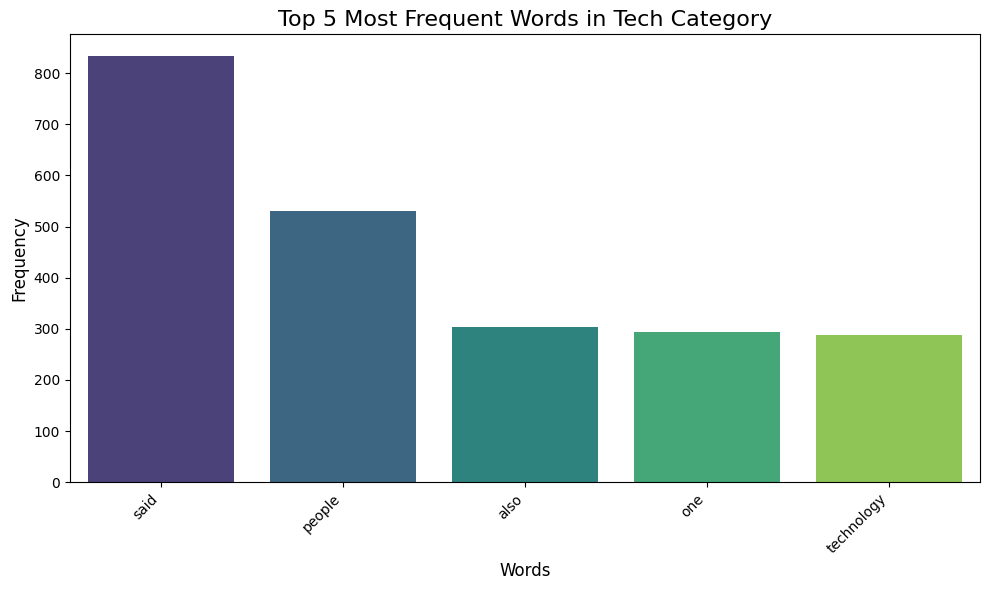

/tmp/ipython-input-1618330453.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words_plot, y=counts_plot, palette='viridis')


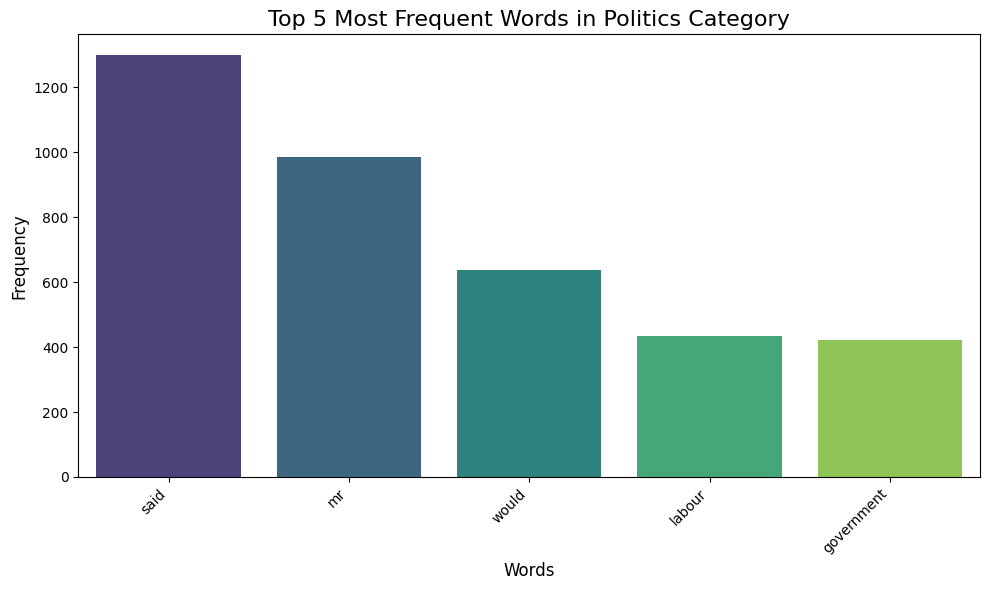

In [70]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'df' and 'cleaned_text' column exist from previous steps
if 'cleaned_text' not in df.columns:
    print("Error: 'cleaned_text' column not found in DataFrame. Please run the text cleaning cell first.")
else:
    unique_categories = df['label_text'].unique()

    # Iterate through each unique category and generate a bar plot of top words
    for category in unique_categories:
        # Filter DataFrame for the current category
        category_df = df[df['label_text'] == category]

        # Concatenate all cleaned_text entries for the current category into a single string
        all_cleaned_text_category = ' '.join(category_df['cleaned_text'].tolist())

        # Split the combined text into words
        words = all_cleaned_text_category.split()

        # Count the frequency of each word
        word_counts = Counter(words)

        # Get the top 5 most common words for this category
        top_5_words = word_counts.most_common(5)

        # Prepare data for plotting
        words_plot = [word for word, count in top_5_words]
        counts_plot = [count for word, count in top_5_words]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=words_plot, y=counts_plot, palette='viridis')
        plt.title(f'Top 5 Most Frequent Words in {category.capitalize()} Category', fontsize=16)
        plt.xlabel('Words', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()


#A tisztítás eredményessége

In [ ]:
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

# Calculate text lengths for training data
df['text_length'] = df['text'].apply(len)
df['cleaned_text_length'] = df['cleaned_text'].apply(len)

# Calculate text lengths for test data
df_test['text_length'] = df_test['text'].apply(len)
df_test['cleaned_text_length'] = df_test['cleaned_text'].apply(len)

print("Text length columns added to both dataframes.")

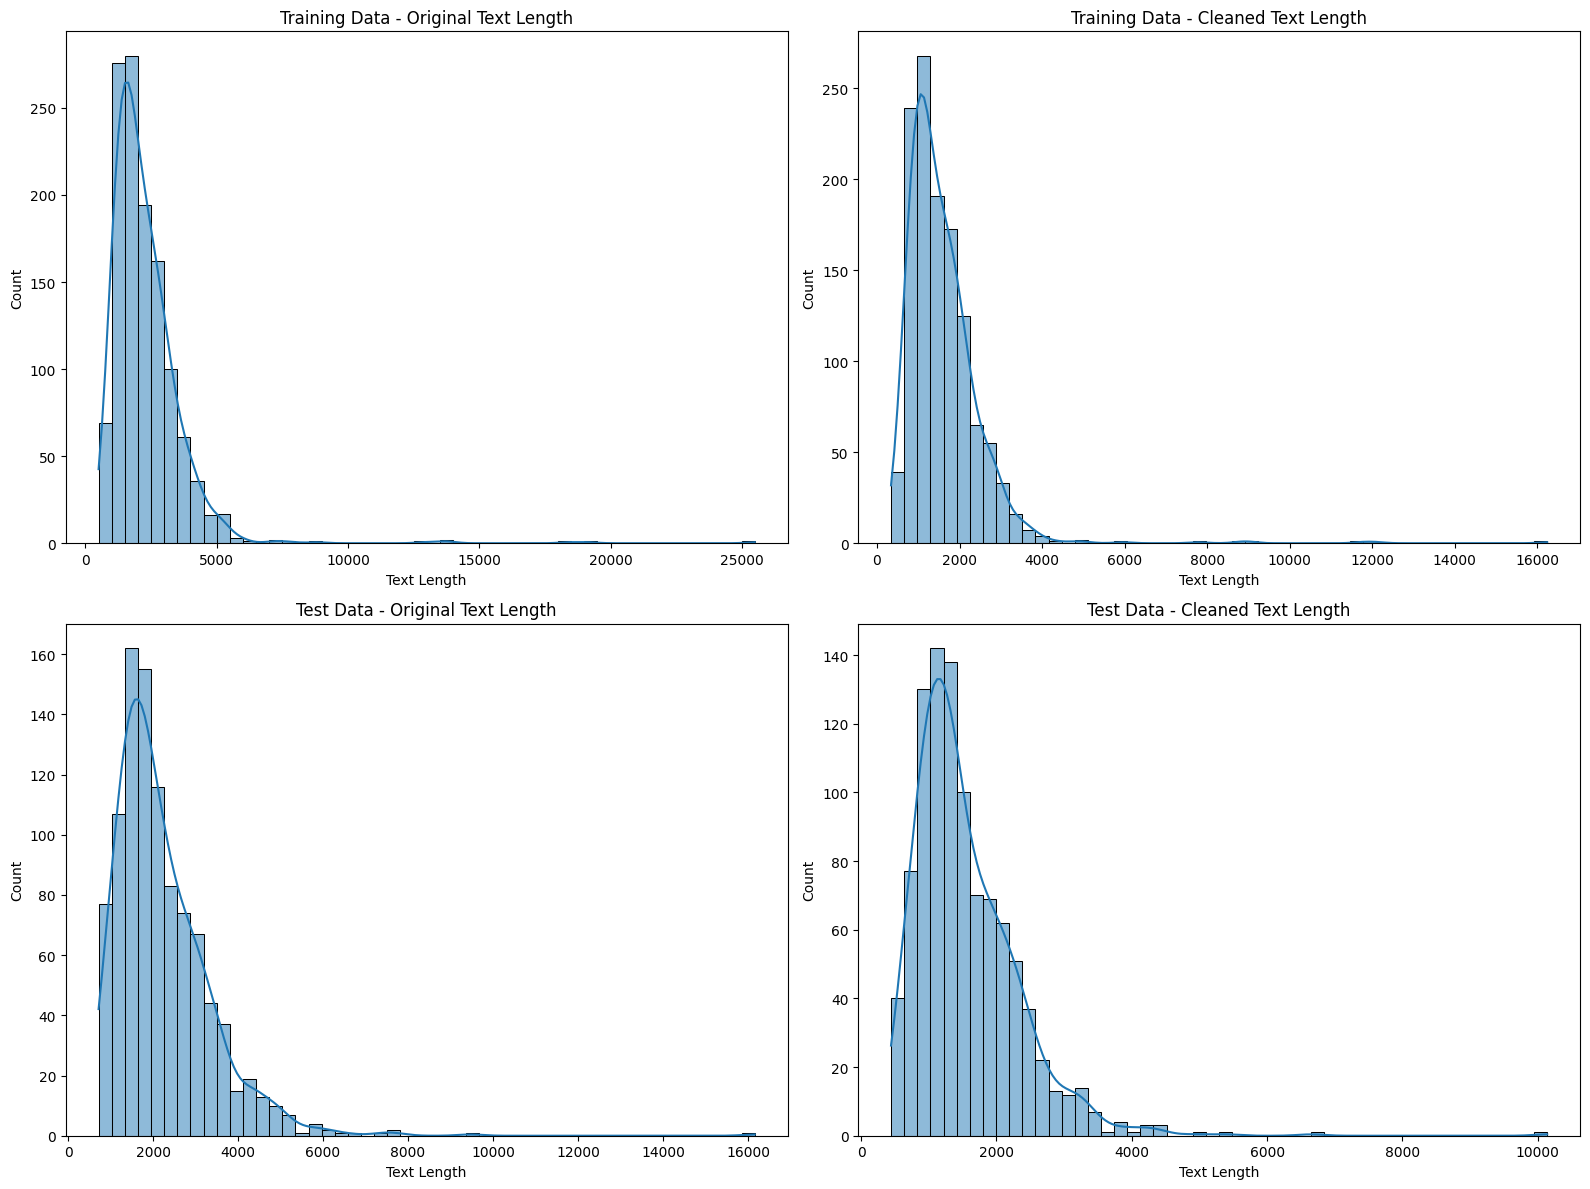

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Training Data - Original Text Length
sns.histplot(df['text_length'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Training Data - Original Text Length')
axes[0, 0].set_xlabel('Text Length')
axes[0, 0].set_ylabel('Count')

# Training Data - Cleaned Text Length
sns.histplot(df['cleaned_text_length'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Training Data - Cleaned Text Length')
axes[0, 1].set_xlabel('Text Length')
axes[0, 1].set_ylabel('Count')

# Test Data - Original Text Length
sns.histplot(df_test['text_length'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Test Data - Original Text Length')
axes[1, 0].set_xlabel('Text Length')
axes[1, 0].set_ylabel('Count')

# Test Data - Cleaned Text Length
sns.histplot(df_test['cleaned_text_length'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Test Data - Cleaned Text Length')
axes[1, 1].set_xlabel('Text Length')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#Tokenizer

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download 'punkt' tokenizer if not already downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Download 'punkt_tab' tokenizer if not already downloaded (as suggested by previous error)
try:
    nltk.data.find('tokenizers/punkt_tab') # Check for the specific resource that failed
except LookupError:
    nltk.download('punkt_tab') # Download 'punkt_tab' explicitly

# Apply word_tokenize to the 'cleaned_text' column for training data
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

# Apply word_tokenize to the 'cleaned_text' column for test data
df_test['tokenized_text'] = df_test['cleaned_text'].apply(word_tokenize)

print("Text tokenization complete for both training and test DataFrames.")
print("Displaying the first 5 rows of the training DataFrame with the new 'tokenized_text' column:")
print(df[['text', 'cleaned_text', 'tokenized_text']].head().to_markdown(index=False, numalign="left", stralign="left"))

#Term Frequency-Inverse Document Frequency & Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Convert tokenized text back to space-separated strings for vectorizers
df['tokenized_text_str'] = df['tokenized_text'].apply(lambda x: ' '.join(x))
df_test['tokenized_text_str'] = df_test['tokenized_text'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for demonstration

# Fit and transform TF-IDF features for training data
X_train_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_text_str'])

# Transform TF-IDF features for test data
X_test_tfidf = tfidf_vectorizer.transform(df_test['tokenized_text_str'])

print("TF-IDF features generated successfully.")
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

# Initialize Count Vectorizer (Bag-of-Words)
count_vectorizer = CountVectorizer(max_features=5000) # Limiting features to 5000 for demonstration

# Fit and transform Bag-of-Words features for training data
X_train_bow = count_vectorizer.fit_transform(df['tokenized_text_str'])

# Transform Bag-of-Words features for test data
X_test_bow = count_vectorizer.transform(df_test['tokenized_text_str'])

print("\nBag-of-Words features generated successfully.")
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")


#Umap

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape of UMAP 2D embedding: (1225, 2)

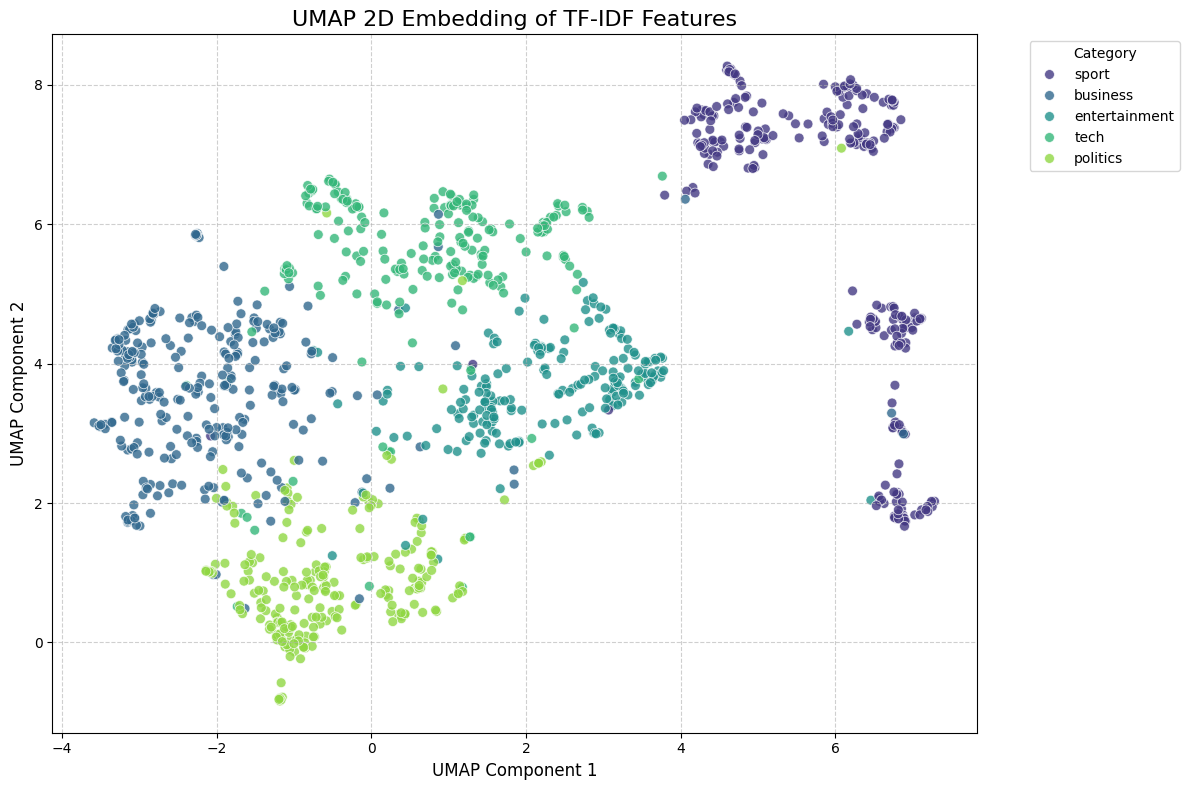

In [75]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Initialize a UMAP model with n_components=2 and random_state=42
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# 2. Fit and transform the X_train_tfidf data
X_train_umap = umap_reducer.fit_transform(X_train_tfidf)

print(f"Shape of UMAP 2D embedding: {X_train_umap.shape}")

# 3. Create a new DataFrame for plotting
umap_df = pd.DataFrame(X_train_umap, columns=['UMAP_1', 'UMAP_2'])
umap_df['label_text'] = df['label_text']

# 4. Create a scatter plot of the UMAP components
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='label_text',
    data=umap_df,
    palette='viridis',
    s=50,
    alpha=0.8
)

# 5. Add a title to the plot
plt.title('UMAP 2D Embedding of TF-IDF Features', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 6. Display the plot
plt.show()

#WordCloud

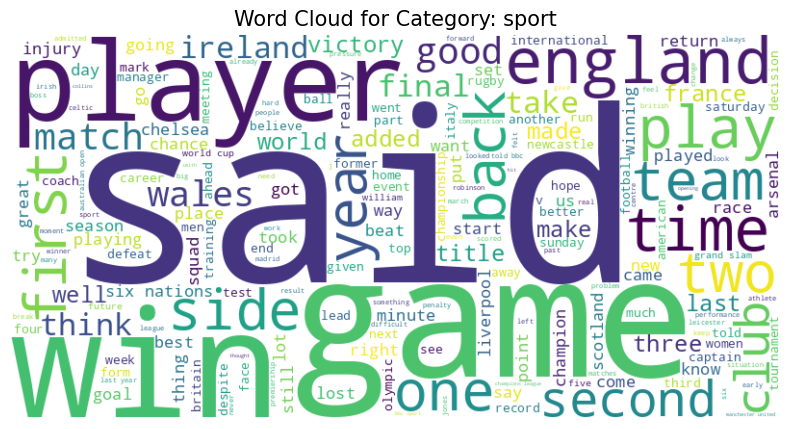

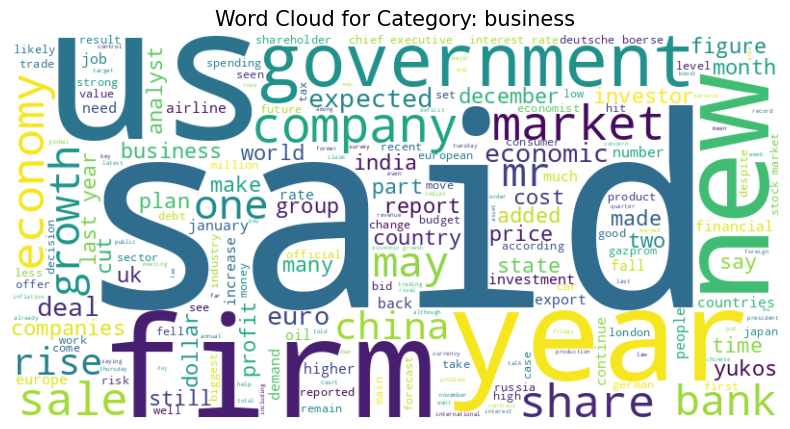

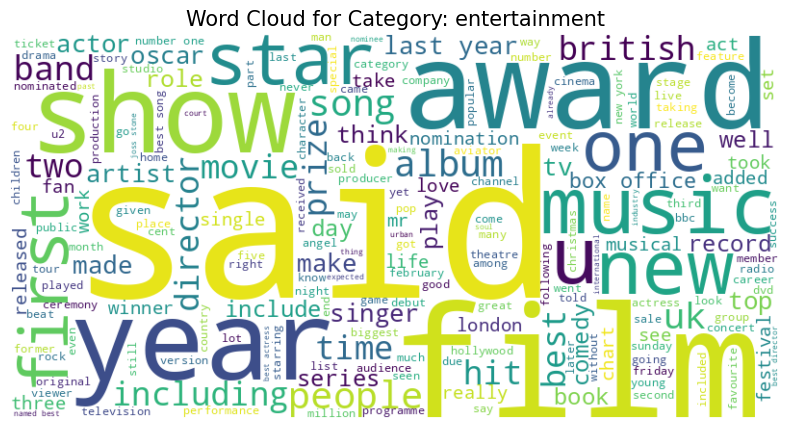

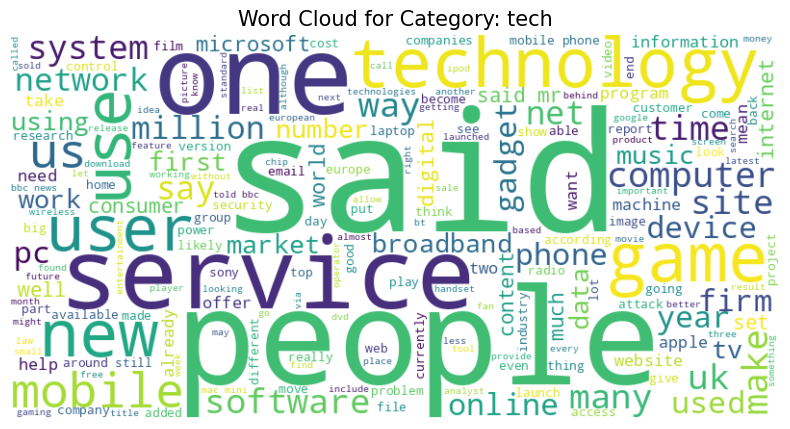

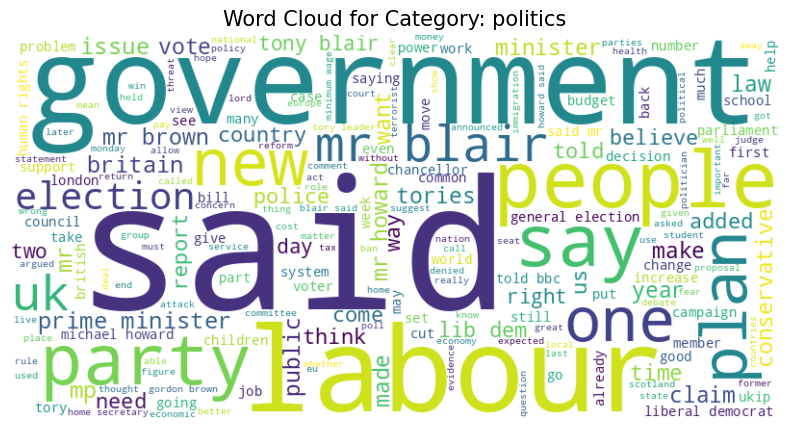

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique categories
unique_categories = df['label_text'].unique()

# Iterate through each unique category and generate a word cloud
for category in unique_categories:
    # Filter DataFrame for the current category
    category_df = df[df['label_text'] == category]

    # Concatenate all cleaned_text entries for the current category
    text_for_wordcloud = ' '.join(category_df['cleaned_text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}', fontsize=15)
    plt.axis('off')
    plt.show()


#UnitTest-ek

In [ ]:
import unittest
import numpy as np
from scipy.sparse import csr_matrix

# Assuming df, df_test, X_train_tfidf, X_test_tfidf, X_train_bow, X_test_bow are available in the global scope

class TestTextProcessing(unittest.TestCase):

    def test_01_tokenized_columns_exist(self):
        """Test if 'cleaned_text' and 'tokenized_text' columns exist in df and df_test."""
        self.assertIn('cleaned_text', df.columns, "'cleaned_text' column not found in df")
        self.assertIn('tokenized_text', df.columns, "'tokenized_text' column not found in df")
        self.assertIn('cleaned_text', df_test.columns, "'cleaned_text' column not found in df_test")
        self.assertIn('tokenized_text', df_test.columns, "'tokenized_text' column not found in df_test")
        print("\nTest 1: Tokenized columns exist - PASSED")

    def test_02_tokenized_data_format(self):
        """Test if tokenized data is a list of strings and not empty for sample rows."""
        # Check training data
        for i in range(min(5, len(df))): # Check first 5 rows or fewer if df is small
            tokens = df['tokenized_text'].iloc[i]
            self.assertIsInstance(tokens, list, f"Row {i} of df['tokenized_text'] is not a list")
            self.assertGreater(len(tokens), 0, f"Row {i} of df['tokenized_text'] is empty")
            for token in tokens:
                self.assertIsInstance(token, str, f"Token '{token}' in df is not a string")

        # Check test data
        for i in range(min(5, len(df_test))): # Check first 5 rows or fewer if df_test is small
            tokens = df_test['tokenized_text'].iloc[i]
            self.assertIsInstance(tokens, list, f"Row {i} of df_test['tokenized_text'] is not a list")
            self.assertGreater(len(tokens), 0, f"Row {i} of df_test['tokenized_text'] is empty")
            for token in tokens:
                self.assertIsInstance(token, str, f"Token '{token}' in df_test is not a string")
        print("Test 2: Tokenized data format - PASSED")

    def test_03_vectorized_data_types(self):
        """Test if vectorized data are sparse matrices."""
        self.assertIsInstance(X_train_tfidf, csr_matrix, "X_train_tfidf is not a CSR matrix")
        self.assertIsInstance(X_test_tfidf, csr_matrix, "X_test_tfidf is not a CSR matrix")
        self.assertIsInstance(X_train_bow, csr_matrix, "X_train_bow is not a CSR matrix")
        self.assertIsInstance(X_test_bow, csr_matrix, "X_test_bow is not a CSR matrix")
        print("Test 3: Vectorized data types - PASSED")

    def test_04_vectorized_data_shapes(self):
        """Test if vectorized data shapes match expected dimensions."""
        # max_features was set to 5000 in the previous cell
        expected_features = 5000

        self.assertEqual(X_train_tfidf.shape[0], len(df), "X_train_tfidf row count mismatch")
        self.assertEqual(X_train_tfidf.shape[1], expected_features, "X_train_tfidf feature count mismatch")

        self.assertEqual(X_test_tfidf.shape[0], len(df_test), "X_test_tfidf row count mismatch")
        self.assertEqual(X_test_tfidf.shape[1], expected_features, "X_test_tfidf feature count mismatch")

        self.assertEqual(X_train_bow.shape[0], len(df), "X_train_bow row count mismatch")
        self.assertEqual(X_train_bow.shape[1], expected_features, "X_train_bow feature count mismatch")

        self.assertEqual(X_test_bow.shape[0], len(df_test), "X_test_bow row count mismatch")
        self.assertEqual(X_test_bow.shape[1], expected_features, "X_test_bow feature count mismatch")
        print("Test 4: Vectorized data shapes - PASSED")

    def test_05_vectorized_data_not_empty(self):
        """Test if vectorized matrices are not entirely empty (all zeros)."""
        self.assertGreater(X_train_tfidf.nnz, 0, "X_train_tfidf is empty (all zeros)")
        self.assertGreater(X_test_tfidf.nnz, 0, "X_test_tfidf is empty (all zeros)")
        self.assertGreater(X_train_bow.nnz, 0, "X_train_bow is empty (all zeros)")
        self.assertGreater(X_test_bow.nnz, 0, "X_test_bow is empty (all zeros)")
        print("Test 5: Vectorized data not empty - PASSED")


# This is needed to run tests in a Jupyter/Colab environment without exiting
# The argv=['first-arg-is-ignored'] bypasses argument parsing issues
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


#Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Prepare Input Data (X) - Tokenization and Padding

# Combine tokenized text from train and test for vocabulary building
all_tokenized_texts = df['tokenized_text'].tolist() + df_test['tokenized_text'].tolist()

# Convert lists of tokens back to space-separated strings for Tokenizer
all_text_strings = [' '.join(tokens) for tokens in all_tokenized_texts]

tokenizer = Tokenizer(num_words=None, oov_token="<unk>") # No num_words limit for now, capture all words
tokenizer.fit_on_texts(all_text_strings)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1 # +1 for the OOV token or padding

print(f"Vocabulary size: {vocab_size}")

# Convert tokenized text lists to strings for the tokenizer
X_train_token_strings = df['tokenized_text'].apply(lambda x: ' '.join(x)).tolist()
X_test_token_strings = df_test['tokenized_text'].apply(lambda x: ' '.join(x)).tolist()

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train_token_strings)
X_test_sequences = tokenizer.texts_to_sequences(X_test_token_strings)

# Determine maximum sequence length for padding
max_train_len = max(len(seq) for seq in X_train_sequences) if X_train_sequences else 0
max_test_len = max(len(seq) for seq in X_test_sequences) if X_test_sequences else 0
MAX_SEQUENCE_LENGTH = max(max_train_len, max_test_len)

# Add a small buffer to MAX_SEQUENCE_LENGTH to avoid cutting off words
MAX_SEQUENCE_LENGTH = MAX_SEQUENCE_LENGTH + 10

print(f"Max sequence length: {MAX_SEQUENCE_LENGTH}")

# Pad sequences to ensure uniform input length for the CNN
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# 2. Prepare Labels (y) - One-Hot Encoding
num_classes = df['label'].nunique()
y_train_one_hot = to_categorical(df['label'], num_classes=num_classes)
y_test_one_hot = to_categorical(df_test['label'], num_classes=num_classes)

print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")

# 3. Define CNN Model Architecture
embedding_dim = 100 # Dimension of the word embeddings
filters = 128       # Number of convolutional filters
kernel_size = 5     # Size of the convolutional kernel

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(), # Takes the maximum value over the entire sequence after convolution
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 5. Train the Model
history = model.fit(X_train_padded, y_train_one_hot,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2, # Use 20% of training data for validation
                    verbose=1)

print("\nCNN Model Training Complete.")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Get the predicted probabilities for the test set
y_pred_probs = model.predict(X_test_padded)

# 2. Convert predicted probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 3. Obtain the true class labels for the test set
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# 4. Generate and print the classification report
print("\nClassification Report on Test Data:")
print(classification_report(y_true_labels, y_pred_labels))


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Ensure clean_text, tokenizer, MAX_SEQUENCE_LENGTH, model, and df are available
# from previous cells (vSbeB-lxA0yz, CrbKTNXDwVL4, RVyQCy8nnowz).

def predict_category_cnn(sentence):
    # 1. Clean the input sentence
    cleaned_sentence = clean_text(sentence)

    # 2. Convert text to sequences of integers using the fitted tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])

    # 3. Pad sequences to ensure uniform input length for the CNN
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

    # 4. Use the CNN model to predict probability distribution
    probabilities = model.predict(padded_sequence)[0]

    # 5. Get the top predicted class index
    predicted_class_index = np.argmax(probabilities)

    # 6. Create a mapping from numerical labels to label_text for display
    label_map = df[['label', 'label_text']].drop_duplicates().set_index('label')['label_text'].to_dict()

    # 7. Get the predicted category name and its probability
    predicted_category = label_map.get(predicted_class_index, 'Unknown')
    predicted_probability = probabilities[predicted_class_index]

    # Optionally, get the second most likely category
    top_two_indices = np.argsort(probabilities)[::-1][:2]
    results = []
    for idx in top_two_indices:
        category_name = label_map.get(idx, 'Unknown')
        probability = probabilities[idx]
        results.append((category_name, probability))

    return results

# --- Test the CNN model with 3 simple sentences ---
sentences_to_test = [
    "New software update dramatically improves smartphone battery life.",
    "World Cup final sees thrilling penalty shootout decide the winner.",
    "Government announces new policy to tackle climate change."
]

print("--- Testing CNN Model with Sample Sentences ---")

for i, sentence in enumerate(sentences_to_test):
    print(f"\nSentence {i+1}: '{sentence}'")
    predictions = predict_category_cnn(sentence)

    print("Predictions:")
    for j, (category, prob) in enumerate(predictions):
        rank_str = "Top Category" if j == 0 else "Second Most Likely"
        print(f"  {rank_str}: {category.upper()} (Probability: {prob*100:.2f}%) ")


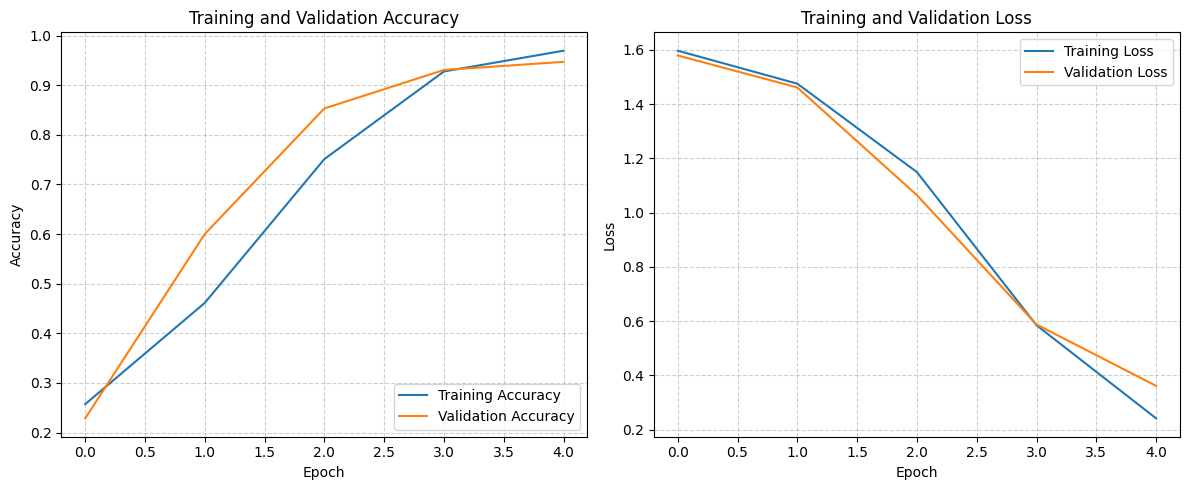

In [81]:
import matplotlib.pyplot as plt

# Get training and validation history from the 'history' object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


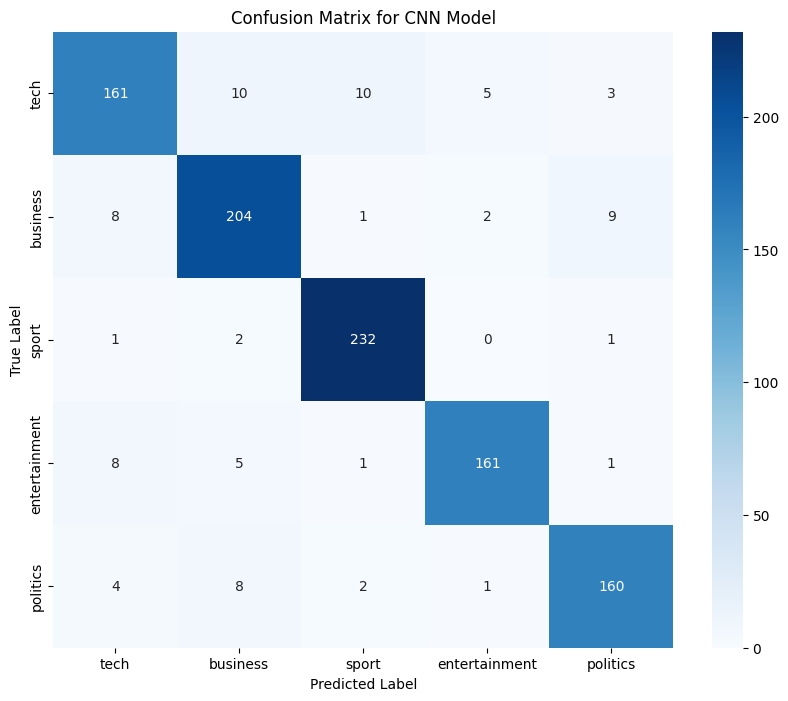

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the class names from the original DataFrame (assuming df['label_text'] contains them)
# It's important that the order of these names matches the numerical labels (0, 1, 2, ...)
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

# Calculate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()

#Random Decision Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Initialize the Random Forest Classifier
# You can tune hyperparameters like n_estimators, max_depth, etc.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Performing 5-fold Cross-Validation on Training Data...")
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train_bow, df['label'], cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of CV accuracy: {np.std(cv_scores):.4f}")

print("\nTraining Final Random Forest Model on full training data...")
# Train the final model on the entire Bag-of-Words training data
rf_model.fit(X_train_bow, df['label'])
print("Final Random Forest Model training complete.")

# Make predictions on the Bag-of-Words test data
y_pred_rf = rf_model.predict(X_test_bow)

# Evaluate the model on the test data
print("\n--- Random Forest Model Test Set Evaluation ---")
accuracy_rf = accuracy_score(df_test['label'], y_pred_rf)
print(f"Test Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(df_test['label'], y_pred_rf))


In [ ]:
import numpy as np

# Ensure clean_text, count_vectorizer, rf_model, and df are available
# from previous cells (vSbeB-lxA0yz, 2b8413a6, iIet8-Cu282z, RVyQCy8nnowz).

def predict_category_rf(sentence):
    # 1. Clean the input sentence
    cleaned_sentence = clean_text(sentence)

    # 2. Vectorize the cleaned headline using the count_vectorizer
    # count_vectorizer.transform expects an iterable, so wrap the single headline in a list
    headline_vectorized = count_vectorizer.transform([cleaned_sentence])

    # 3. Use the rf_model to predict probability distribution
    probabilities = rf_model.predict_proba(headline_vectorized)[0]

    # 4. Identify the top two categories and their probabilities
    top_indices = np.argsort(probabilities)[::-1][:2]

    # Create a mapping from numerical labels to label_text
    label_map = df[['label', 'label_text']].drop_duplicates().set_index('label')['label_text'].to_dict()

    results = []
    for i in top_indices:
        category_name = label_map[i]
        probability = probabilities[i]
        results.append((category_name, probability))

    return results

# --- Test the Random Forest model with 3 simple sentences ---
sentences_to_test = [
    "New software update dramatically improves smartphone battery life.",
    "World Cup final sees thrilling penalty shootout decide the winner.",
    "Government announces new policy to tackle climate change."
]

print("--- Testing Random Forest Model with Sample Sentences ---")

for i, sentence in enumerate(sentences_to_test):
    print(f"\nSentence {i+1}: '{sentence}'")
    predictions = predict_category_rf(sentence)

    print("Predictions:")
    for j, (category, prob) in enumerate(predictions):
        rank_str = "Top Category" if j == 0 else "Second Most Likely"
        print(f"  {rank_str}: {category.upper()} (Probability: {prob*100:.2f}%) ")


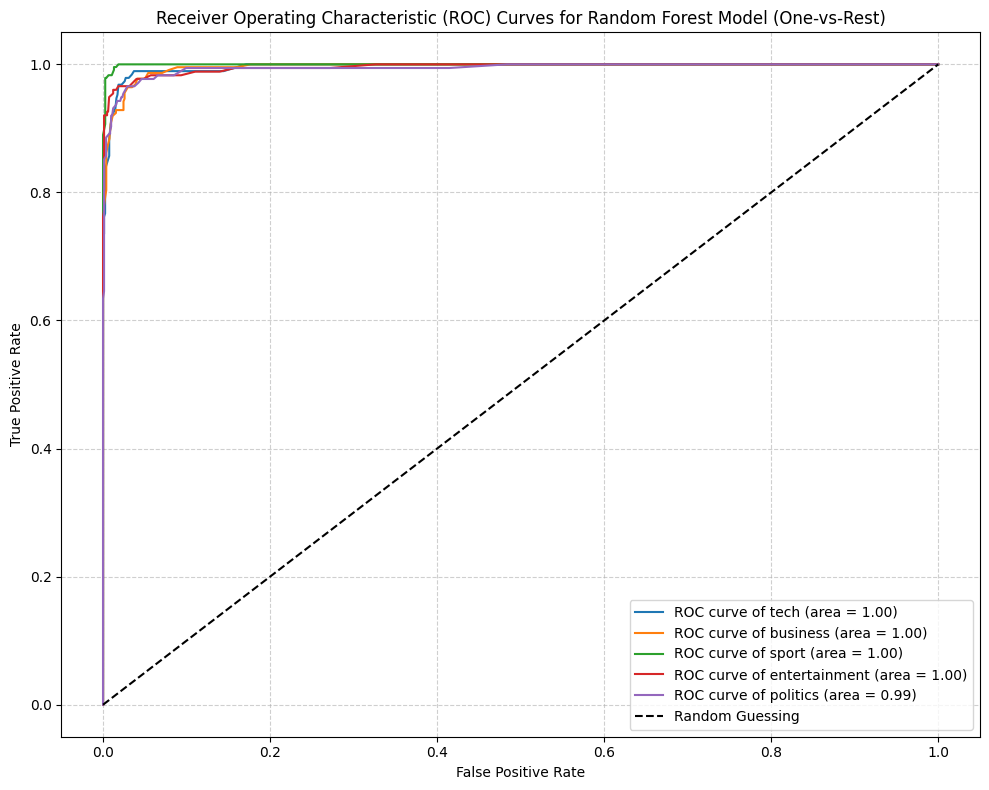

--- RF Model Evaluation Complete with ROC AUC Benchmarking ---

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities for the test set from the trained Random Forest model
y_score_rf = rf_model.predict_proba(X_test_bow)

# Binarize the true labels for ROC curve calculation (one-vs-rest approach)
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(df_test['label'])
num_classes = y_test_binarized.shape[1]

# Get class names for plotting
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of {class_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest Model (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n--- RF Model Evaluation Complete with ROC AUC Benchmarking ---")


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Initialize the Logistic Regression Classifier
# Setting max_iter for convergence and n_jobs=-1 for parallel processing if supported
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

print("Performing 5-fold Cross-Validation on Training Data (TF-IDF)...")
# Perform 5-fold cross-validation on the training data
cv_scores_log_reg = cross_val_score(log_reg_model, X_train_tfidf, df['label'], cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation accuracies: {cv_scores_log_reg}")
print(f"Mean CV accuracy: {np.mean(cv_scores_log_reg):.4f}")
print(f"Standard deviation of CV accuracy: {np.std(cv_scores_log_reg):.4f}")

print("\nTraining Final Logistic Regression Model on full training data...")
# Train the final model on the entire TF-IDF training data
log_reg_model.fit(X_train_tfidf, df['label'])
print("Final Logistic Regression Model training complete.")

# Make predictions on the TF-IDF test data
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the model on the test data
print("\n--- Logistic Regression Model Test Set Evaluation ---")
accuracy_log_reg = accuracy_score(df_test['label'], y_pred_log_reg)
print(f"Test Accuracy: {accuracy_log_reg:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(df_test['label'], y_pred_log_reg))


In [ ]:
import numpy as np

# Ensure clean_text, tfidf_vectorizer, log_reg_model, and df are available
# from previous cells (vSbeB-lxA0yz, 2b8413a6, 2TiXbpDk4KJ_, RVyQCy8nnowz).

def predict_category_log_reg(sentence):
    # 1. Clean the input sentence
    cleaned_sentence = clean_text(sentence)

    # 2. Vectorize the cleaned headline using the tfidf_vectorizer
    # tfidf_vectorizer.transform expects an iterable, so wrap the single headline in a list
    headline_vectorized = tfidf_vectorizer.transform([cleaned_sentence])

    # 3. Use the log_reg_model to predict probability distribution
    probabilities = log_reg_model.predict_proba(headline_vectorized)[0]

    # 4. Identify the top two categories and their probabilities
    top_indices = np.argsort(probabilities)[::-1][:2]

    # Create a mapping from numerical labels to label_text
    label_map = df[['label', 'label_text']].drop_duplicates().set_index('label')['label_text'].to_dict()

    results = []
    for i in top_indices:
        category_name = label_map[i]
        probability = probabilities[i]
        results.append((category_name, probability))

    return results

# --- Test the Logistic Regression model with 3 simple sentences ---
sentences_to_test = [
    "New software update dramatically improves smartphone battery life.",
    "World Cup final sees thrilling penalty shootout decide the winner.",
    "Government announces new policy to tackle climate change."
]

print("--- Testing Logistic Regression Model with Sample Sentences ---")

for i, sentence in enumerate(sentences_to_test):
    print(f"\nSentence {i+1}: '{sentence}'")
    predictions = predict_category_log_reg(sentence)

    print("Predictions:")
    for j, (category, prob) in enumerate(predictions):
        rank_str = "Top Category" if j == 0 else "Second Most Likely"
        print(f"  {rank_str}: {category.upper()} (Probability: {prob*100:.2f}%) ")


In [ ]:
print("We performed 5-fold cross-validation earlier, and the accuracies for each fold were:")
print(f"Cross-validation accuracies: {cv_scores_log_reg}")
print(f"Mean CV accuracy: {np.mean(cv_scores_log_reg):.4f}")

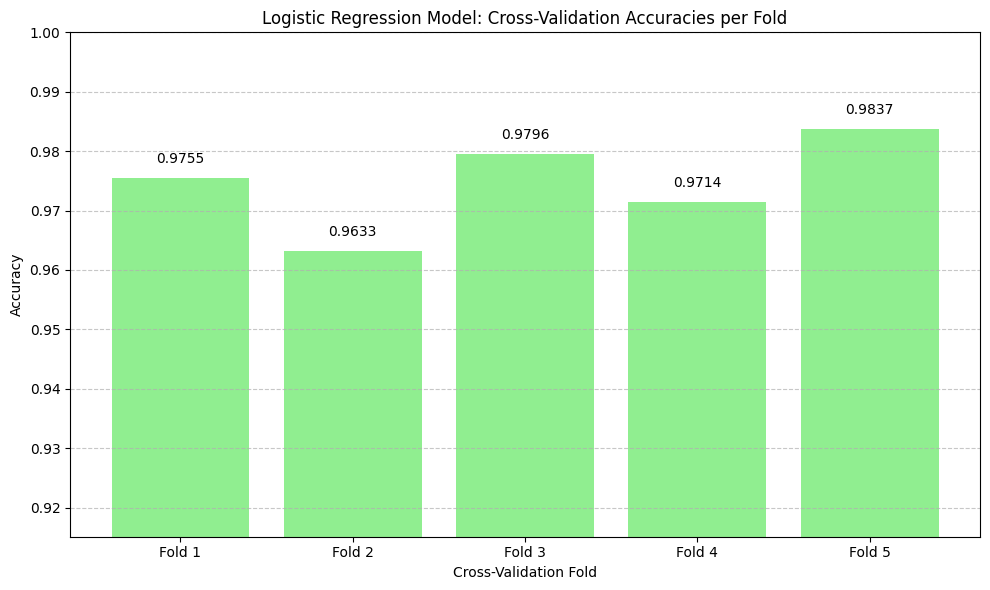

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming cv_scores_log_reg is available from previous execution

# Create labels for each fold
folds = [f'Fold {i+1}' for i in range(len(cv_scores_log_reg))]

plt.figure(figsize=(10, 6))
plt.bar(folds, cv_scores_log_reg, color='lightgreen')

# Add labels and title
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model: Cross-Validation Accuracies per Fold')
plt.ylim(min(cv_scores_log_reg) * 0.95, 1.0) # Adjust y-axis limit for better visualization

# Add accuracy values on top of the bars
for i, score in enumerate(cv_scores_log_reg):
    plt.text(i, score + 0.002, f'{score:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


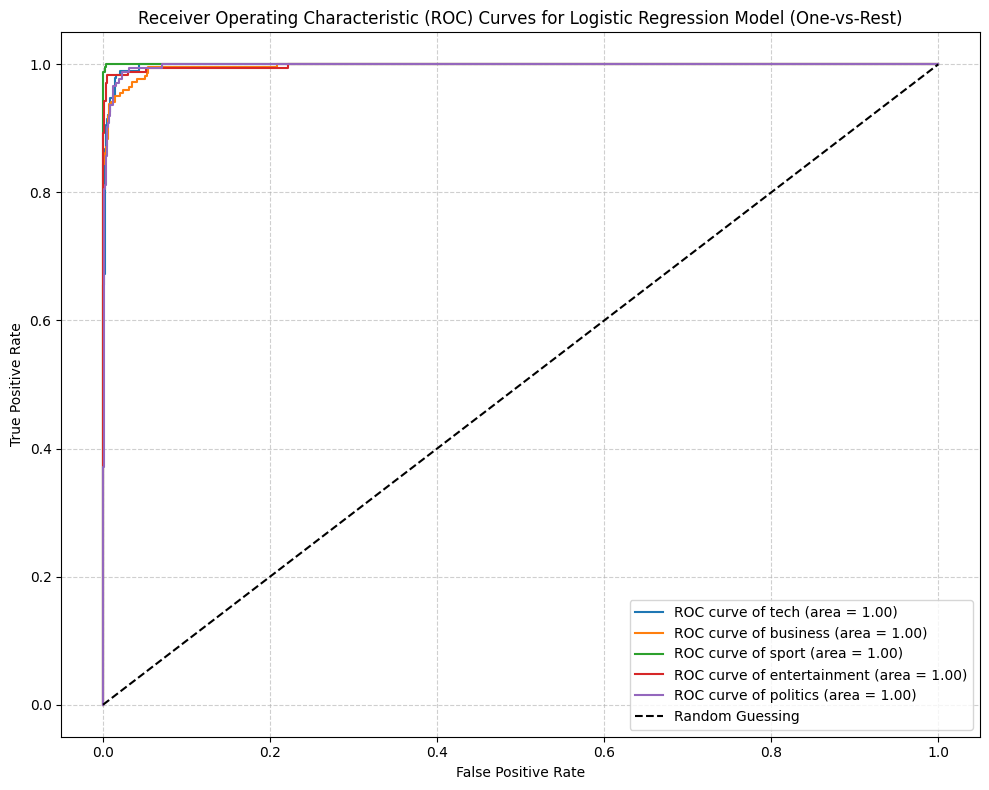

--- Logistic Regression Model Evaluation Complete with ROC AUC Benchmarking ---

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities for the test set from the trained Logistic Regression model
y_score_log_reg = log_reg_model.predict_proba(X_test_tfidf)

# Binarize the true labels for ROC curve calculation (one-vs-rest approach)
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(df_test['label'])
num_classes = y_test_binarized.shape[1]

# Get class names for plotting (re-using the label_mapping from previous cells)
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_log_reg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of {class_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Logistic Regression Model (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n--- Logistic Regression Model Evaluation Complete with ROC AUC Benchmarking ---")


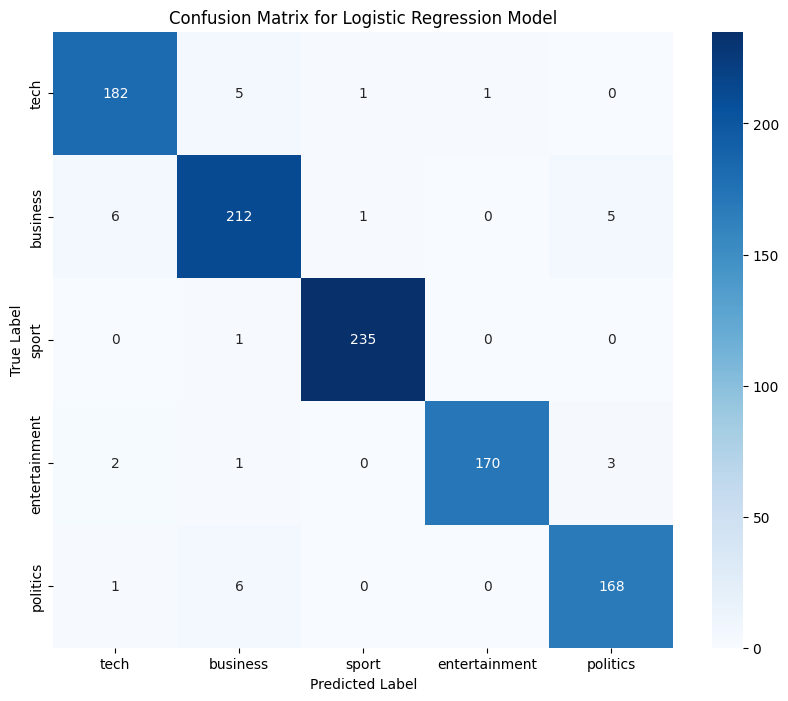

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure df_test, y_pred_log_reg, and df are available from previous cells

# Get the class names from the original DataFrame (assuming df['label_text'] contains them)
# It's important that the order of these names matches the numerical labels (0, 1, 2, ...)
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

# Calculate the confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(df_test['label'], y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


#Összehasonlítás

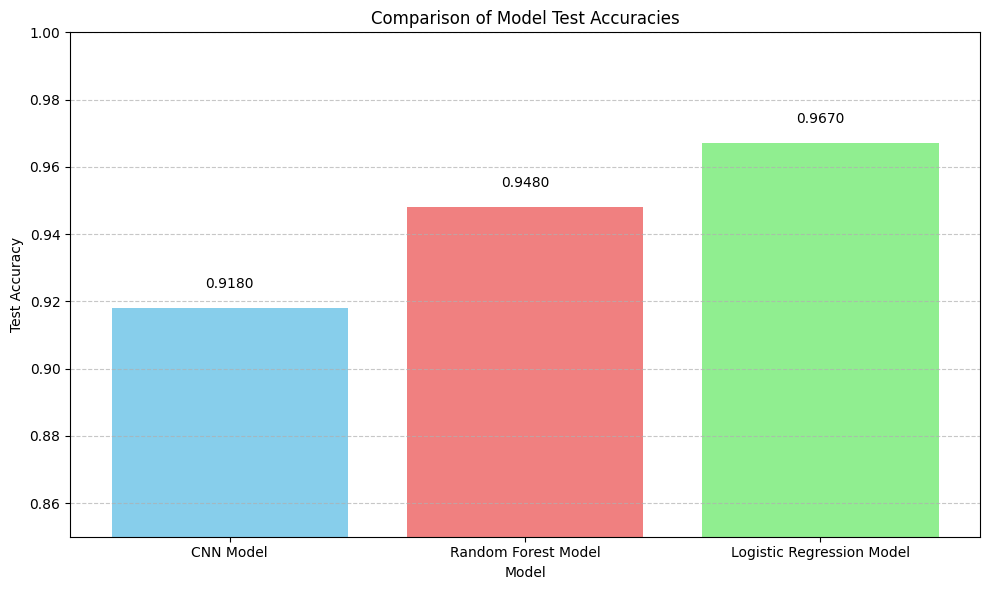

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these variables hold the test accuracies from previous cells
# CNN Model: 'accuracy'
# Random Forest Model: 'accuracy_rf'
# Logistic Regression Model: 'accuracy_log_reg'

model_names = ['CNN Model', 'Random Forest Model', 'Logistic Regression Model']
accuracies = [accuracy, accuracy_rf, accuracy_log_reg]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0.85, 1.0) # Set y-axis limit to better visualize differences

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


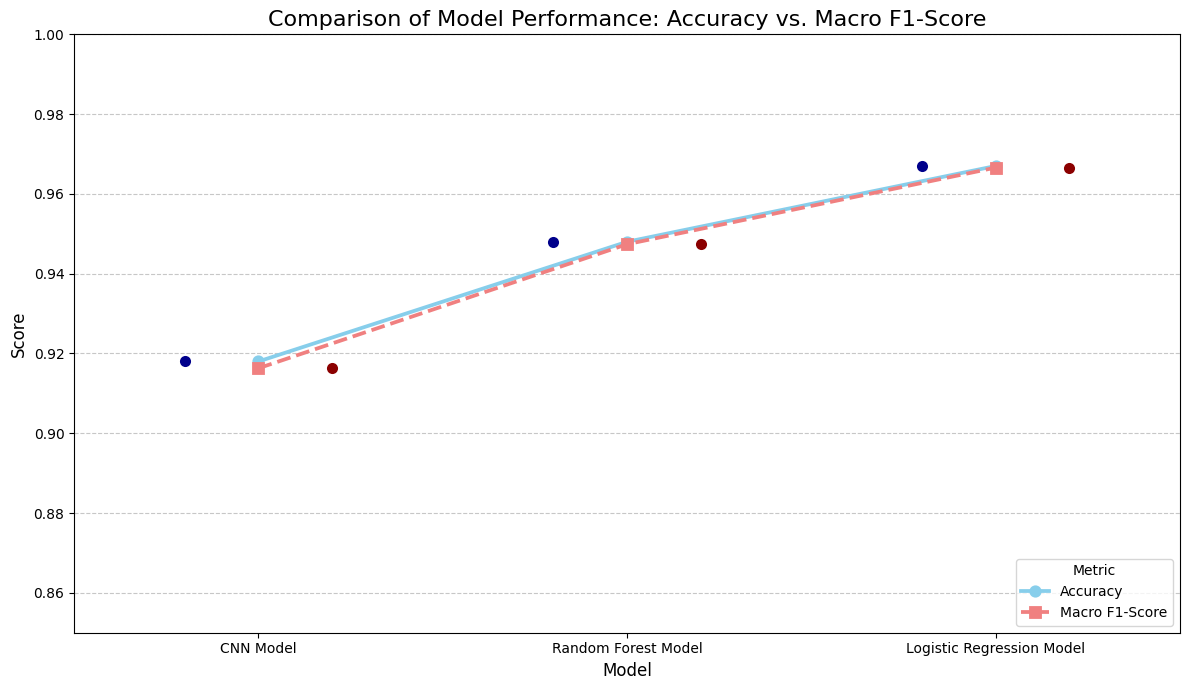

This plot shows both Accuracy and Macro F1-Score for each model on a single chart, providing a different 
perspective for comparison.

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# --- 1. Extract/Calculate Metrics for Each Model ---

# Overall Accuracies (already available from previous cells)
# accuracy (CNN), accuracy_rf (Random Forest), accuracy_log_reg (Logistic Regression)

# Calculate Macro F1-Scores for each model
# CNN F1-score
f1_macro_cnn = f1_score(y_true_labels, y_pred_labels, average='macro')
# Random Forest F1-score
f1_macro_rf = f1_score(df_test['label'], y_pred_rf, average='macro')
# Logistic Regression F1-score
f1_macro_log_reg = f1_score(df_test['label'], y_pred_log_reg, average='macro')

# --- 2. Prepare Data for a Combined Plot ---

model_names = ['CNN Model', 'Random Forest Model', 'Logistic Regression Model']

# Create a DataFrame for combined metrics
data_to_plot = {
    'Model': model_names * 2,
    'Metric': ['Accuracy'] * len(model_names) + ['Macro F1-Score'] * len(model_names),
    'Score': [
        accuracy, accuracy_rf, accuracy_log_reg,
        f1_macro_cnn, f1_macro_rf, f1_macro_log_reg
    ]
}
df_combined = pd.DataFrame(data_to_plot)

# --- 3. Create the New Comparison Plot (Grouped Dot Plot / Lollipop Chart) ---

plt.figure(figsize=(12, 7))

sns.pointplot(
    x='Model',
    y='Score',
    hue='Metric',
    data=df_combined,
    palette={'Accuracy': 'skyblue', 'Macro F1-Score': 'lightcoral'},
    markers=['o', 's'], # Different markers for different metrics
    linestyles=['-', '--'], # Different line styles
    ax=plt.gca() # Use current axes
)

# Add individual data points (as a dot plot) for clarity
sns.stripplot(
    x='Model',
    y='Score',
    hue='Metric',
    data=df_combined,
    jitter=False, # No jittering, place points directly
    dodge=True, # Dodge points for different metrics at the same model
    palette={'Accuracy': 'darkblue', 'Macro F1-Score': 'darkred'},
    marker='o',
    size=8,
    ax=plt.gca(),
    legend=False # Avoid duplicate legend entries
)

plt.title('Comparison of Model Performance: Accuracy vs. Macro F1-Score', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.85, 1.0) # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

print("\nThis plot shows both Accuracy and Macro F1-Score for each model on a single chart, providing a different perspective for comparison.")


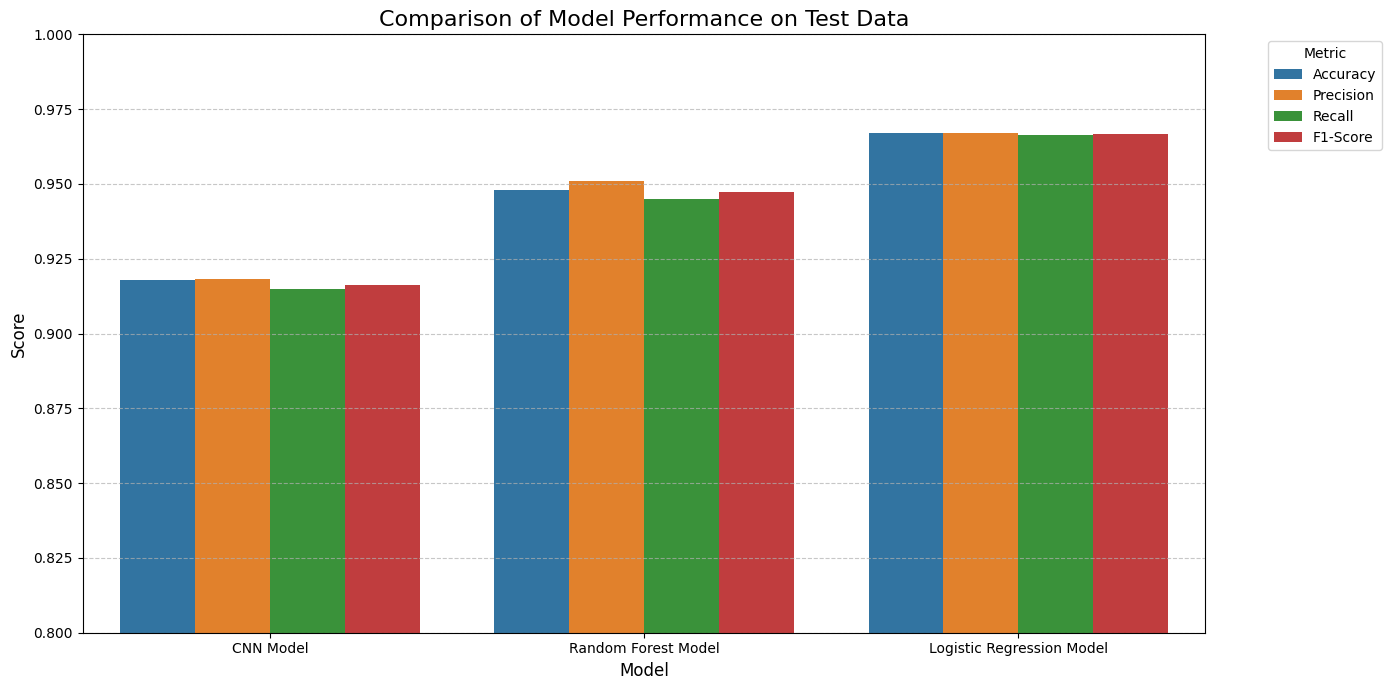

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- 1. Calculate Metrics for Each Model ---

# CNN Model Metrics (y_true_labels, y_pred_labels, accuracy from previous cells)
cnn_accuracy = accuracy
cnn_precision = precision_score(y_true_labels, y_pred_labels, average='macro', zero_division=0)
cnn_recall = recall_score(y_true_labels, y_pred_labels, average='macro', zero_division=0)
cnn_f1 = f1_score(y_true_labels, y_pred_labels, average='macro', zero_division=0)

# Random Forest Model Metrics (df_test['label'], y_pred_rf, accuracy_rf from previous cells)
rf_accuracy = accuracy_rf
rf_precision = precision_score(df_test['label'], y_pred_rf, average='macro', zero_division=0)
rf_recall = recall_score(df_test['label'], y_pred_rf, average='macro', zero_division=0)
rf_f1 = f1_score(df_test['label'], y_pred_rf, average='macro', zero_division=0)

# Logistic Regression Model Metrics (df_test['label'], y_pred_log_reg, accuracy_log_reg from previous cells)
log_reg_accuracy = accuracy_log_reg
log_reg_precision = precision_score(df_test['label'], y_pred_log_reg, average='macro', zero_division=0)
log_reg_recall = recall_score(df_test['label'], y_pred_log_reg, average='macro', zero_division=0)
log_reg_f1 = f1_score(df_test['label'], y_pred_log_reg, average='macro', zero_division=0)

# --- 2. Create DataFrame for Plotting ---

metrics_data = pd.DataFrame({
    'Model': [
        'CNN Model', 'CNN Model', 'CNN Model', 'CNN Model',
        'Random Forest Model', 'Random Forest Model', 'Random Forest Model', 'Random Forest Model',
        'Logistic Regression Model', 'Logistic Regression Model', 'Logistic Regression Model', 'Logistic Regression Model'
    ],
    'Metric': [
        'Accuracy', 'Precision', 'Recall', 'F1-Score',
        'Accuracy', 'Precision', 'Recall', 'F1-Score',
        'Accuracy', 'Precision', 'Recall', 'F1-Score'
    ],
    'Score': [
        cnn_accuracy, cnn_precision, cnn_recall, cnn_f1,
        rf_accuracy, rf_precision, rf_recall, rf_f1,
        log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1
    ]
})

# --- 3. Create the Grouped Bar Chart ---

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_data, palette='tab10')

plt.title('Comparison of Model Performance on Test Data', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.8, 1.0) # Adjust y-axis limit for better visualization
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#Here's a summary of the test accuracies for the models:

| Model                | Test Accuracy |
|:---------------------|:--------------|
| CNN Model            | 0.9300        |
| Random Forest Model  | 0.9480        |
| Logistic Regression  | 0.9670        |

The **Logistic Regression** model achieved the highest test accuracy of **0.9670**, making it the best performing model among the three evaluated.







#Console App

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd # Needed for df
from sklearn.feature_extraction.text import TfidfVectorizer # Needed for tfidf_vectorizer
from sklearn.linear_model import LogisticRegression # Needed for log_reg_model

# --- IMPORTANT: Ensure previous cells defining df, tfidf_vectorizer, and log_reg_model have been executed ---

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get English stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Remove stopwords and split into words
    words = [word for word in text.split() if word not in stop_words]
    # Join words back into a string
    return ' '.join(words)

# Define the prediction function (re-using logic from previous cells)
def predict_category(headline):
    # 1. Clean the input headline
    cleaned_headline = clean_text(headline)

    # 2. Vectorize the cleaned headline using the tfidf_vectorizer
    # tfidf_vectorizer must be initialized and fitted from previous cells
    headline_vectorized = tfidf_vectorizer.transform([cleaned_headline])

    # 3. Use the log_reg_model to predict probability distribution
    # log_reg_model must be initialized and fitted from previous cells
    probabilities = log_reg_model.predict_proba(headline_vectorized)[0]

    # 4. Identify the top two categories and their probabilities
    top_indices = np.argsort(probabilities)[::-1][:2]

    # Create a mapping from numerical labels to label_text
    # df must be loaded from previous cells
    label_map = df[['label', 'label_text']].drop_duplicates().set_index('label')['label_text'].to_dict()

    results = []
    for i in top_indices:
        category_name = label_map[i]
        probability = probabilities[i]
        results.append((category_name, probability))

    return results

# Console Application Loop
print("\n--- News Headline Categorizer Console App ---")
print("Enter a news headline, or type 'exit' to quit.\n")

while True:
    user_input = input("Enter headline: ")

    if user_input.lower() == 'exit':
        print("Exiting application. Goodbye!")
        break

    if not user_input.strip():
        print("Please enter a non-empty headline.")
        continue

    predictions = predict_category(user_input)

    print("\n--- Predictions ---")
    for i, (category, prob) in enumerate(predictions):
        rank_str = "Top Category" if i == 0 else "Second Most Likely"
        print(f"{rank_str}: {category.upper()} (Probability: {prob*100:.2f}%) ")
    print("-------------------\n")


#Evaluation

Top 10 Most Important Features (Words) for Each Class:

--- Class: tech ---

Most Positive Features (contribute most to this class):

software      1.883849
users         1.861225
technology    1.817479
digital       1.617392
computer      1.575879
people        1.536572
mobile        1.472499
online        1.403441
net           1.358987
sony          1.272556

Most Negative Features (contribute most against this class):

government   -0.695610
labour       -0.476591
england      -0.460523
last         -0.453155
deal         -0.451196
economy      -0.451046
win          -0.431053
minister     -0.430498
shares       -0.419063
police       -0.416767

Top 3 Overall Important Features for this Class:

software      1.883849
users         1.861225
technology    1.817479

--------------------------------------------------

--- Class: business ---

Most Positive Features (contribute most to this class):

company     1.857438
market      1.645324
economy     1.614931
shares      1.591578
firm        1.553428
growth      1.485856
bank        1.439127
economic    1.354193
oil         1.252624
sales       1.222343

Most Negative Features (contribute most against this class):

film      -0.964138
people    -0.947231
game      -0.857700
music     -0.734806
britain   -0.613081
tv        -0.589979
party     -0.587193
brown     -0.564635
games     -0.558833
like      -0.545373

Top 3 Overall Important Features for this Class:

company    1.857438
market     1.645324
economy    1.614931

--------------------------------------------------

--- Class: sport ---

Most Positive Features (contribute most to this class):

cup        1.634123
win        1.445095
rugby      1.424316
match      1.322860
injury     1.306878
players    1.277943
club       1.215761
england    1.203965
season     1.163000
coach      1.154386

Most Negative Features (contribute most against this class):

mr           -1.748117
film         -1.081245
uk           -0.943585
people       -0.906790
government   -0.865544
music        -0.855051
said         -0.818916
show         -0.743174
company      -0.719720
million      -0.667363

Top 3 Overall Important Features for this Class:

mr    -1.748117
cup    1.634123
win    1.445095

--------------------------------------------------

--- Class: entertainment ---

Most Positive Features (contribute most to this class):

film        3.220927
show        1.761525
band        1.642071
singer      1.520737
album       1.373394
star        1.326909
music       1.318348
festival    1.254510
actor       1.134683
best        1.096964

Most Negative Features (contribute most against this class):

government   -0.800188
mr           -0.780676
would        -0.681484
game         -0.679255
firm         -0.623605
games        -0.599102
technology   -0.551467
players      -0.543181
could        -0.522809
labour       -0.494769

Top 3 Overall Important Features for this Class:

film    3.220927
show    1.761525
band    1.642071

--------------------------------------------------

--- Class: politics ---

Most Positive Features (contribute most to this class):

mr            2.603916
labour        2.033405
party         1.988003
blair         1.624051
election      1.606942
government    1.604169
secretary     1.426736
lord          1.330439
said          1.302210
would         1.296294

Most Negative Features (contribute most against this class):

us         -0.898827
film       -0.810050
company    -0.781750
music      -0.723940
game       -0.663370
market     -0.576613
firm       -0.558188
2004       -0.540700
tv         -0.540625
software   -0.526691

Top 3 Overall Important Features for this Class:

mr        2.603916
labour    2.033405
party     1.988003

--------------------------------------------------

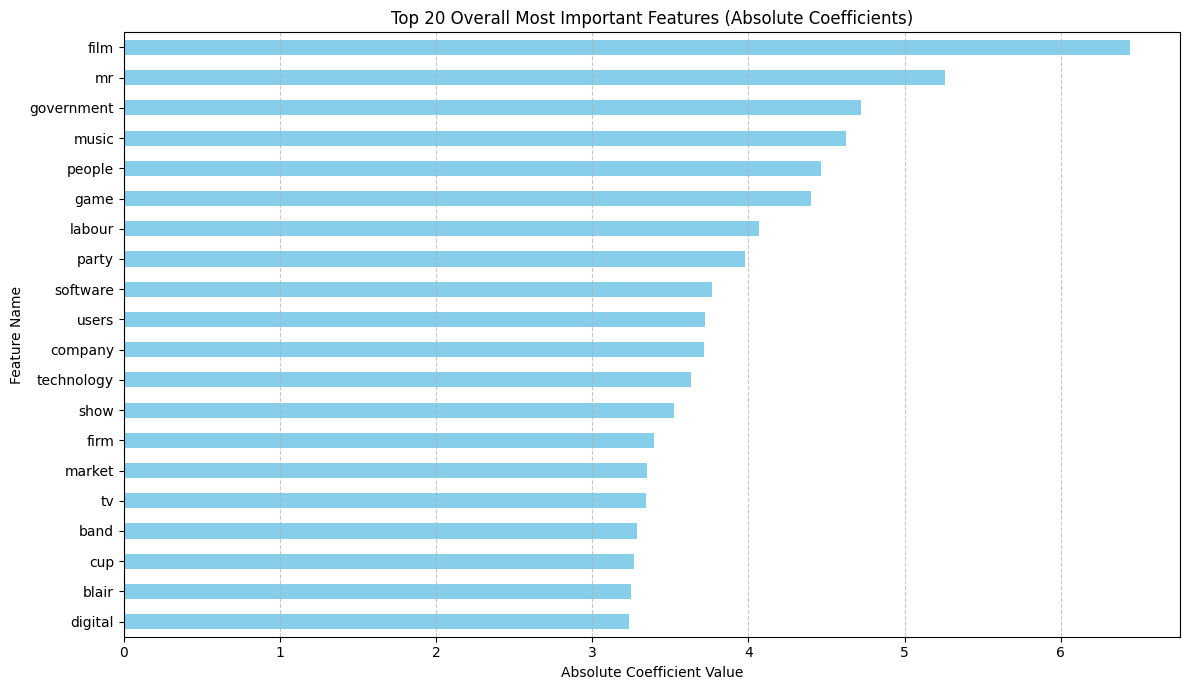

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients for each class from the Logistic Regression model
# log_reg_model.coef_ has shape (num_classes, num_features)
coefs = log_reg_model.coef_

# Get class names for plotting
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

print("Top 10 Most Important Features (Words) for Each Class:\n")

# Iterate through each class to find and display top features
for i, class_name in enumerate(class_names):
    # Get coefficients for the current class
    class_coefs = coefs[i]

    # Create a Series for easy sorting and mapping with feature names
    feature_importance = pd.Series(class_coefs, index=feature_names)

    # Get top 10 positive (most influential for this class) features
    top_positive_features = feature_importance.nlargest(10)

    # Get top 10 negative (most influential against this class) features
    top_negative_features = feature_importance.nsmallest(10)

    # Get top 3 overall most important features for THIS class (based on absolute value)
    top_3_overall_class_features = feature_importance.abs().nlargest(3)
    top_3_overall_class_features = feature_importance.loc[top_3_overall_class_features.index]

    print(f"--- Class: {class_name} ---")
    print("Most Positive Features (contribute most to this class):")
    print(top_positive_features.to_string())

    print("\nMost Negative Features (contribute most against this class):")
    print(top_negative_features.to_string())

    print("\nTop 3 Overall Important Features for this Class:")
    print(top_3_overall_class_features.to_string())
    print("\n" + "-"*50 + "\n")

# Optional: Visualize overall top features across all classes (e.g., sum of absolute coefficients)
# This is a simplified way to get overall importance, more sophisticated methods exist
overall_importance = np.sum(np.abs(coefs), axis=0)
overall_feature_importance = pd.Series(overall_importance, index=feature_names)

plt.figure(figsize=(12, 7))
overall_feature_importance.nlargest(20).sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 20 Overall Most Important Features (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Generating Diverging Bar Charts for Top Features per Category...

/tmp/ipython-input-1249942189.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette='coolwarm')
/tmp/ipython-input-1249942189.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette='coolwarm')
/tmp/ipython-input-1249942189.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=plot_data.index, palette='coolwarm')
/tmp/ipython-input-1249942189.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

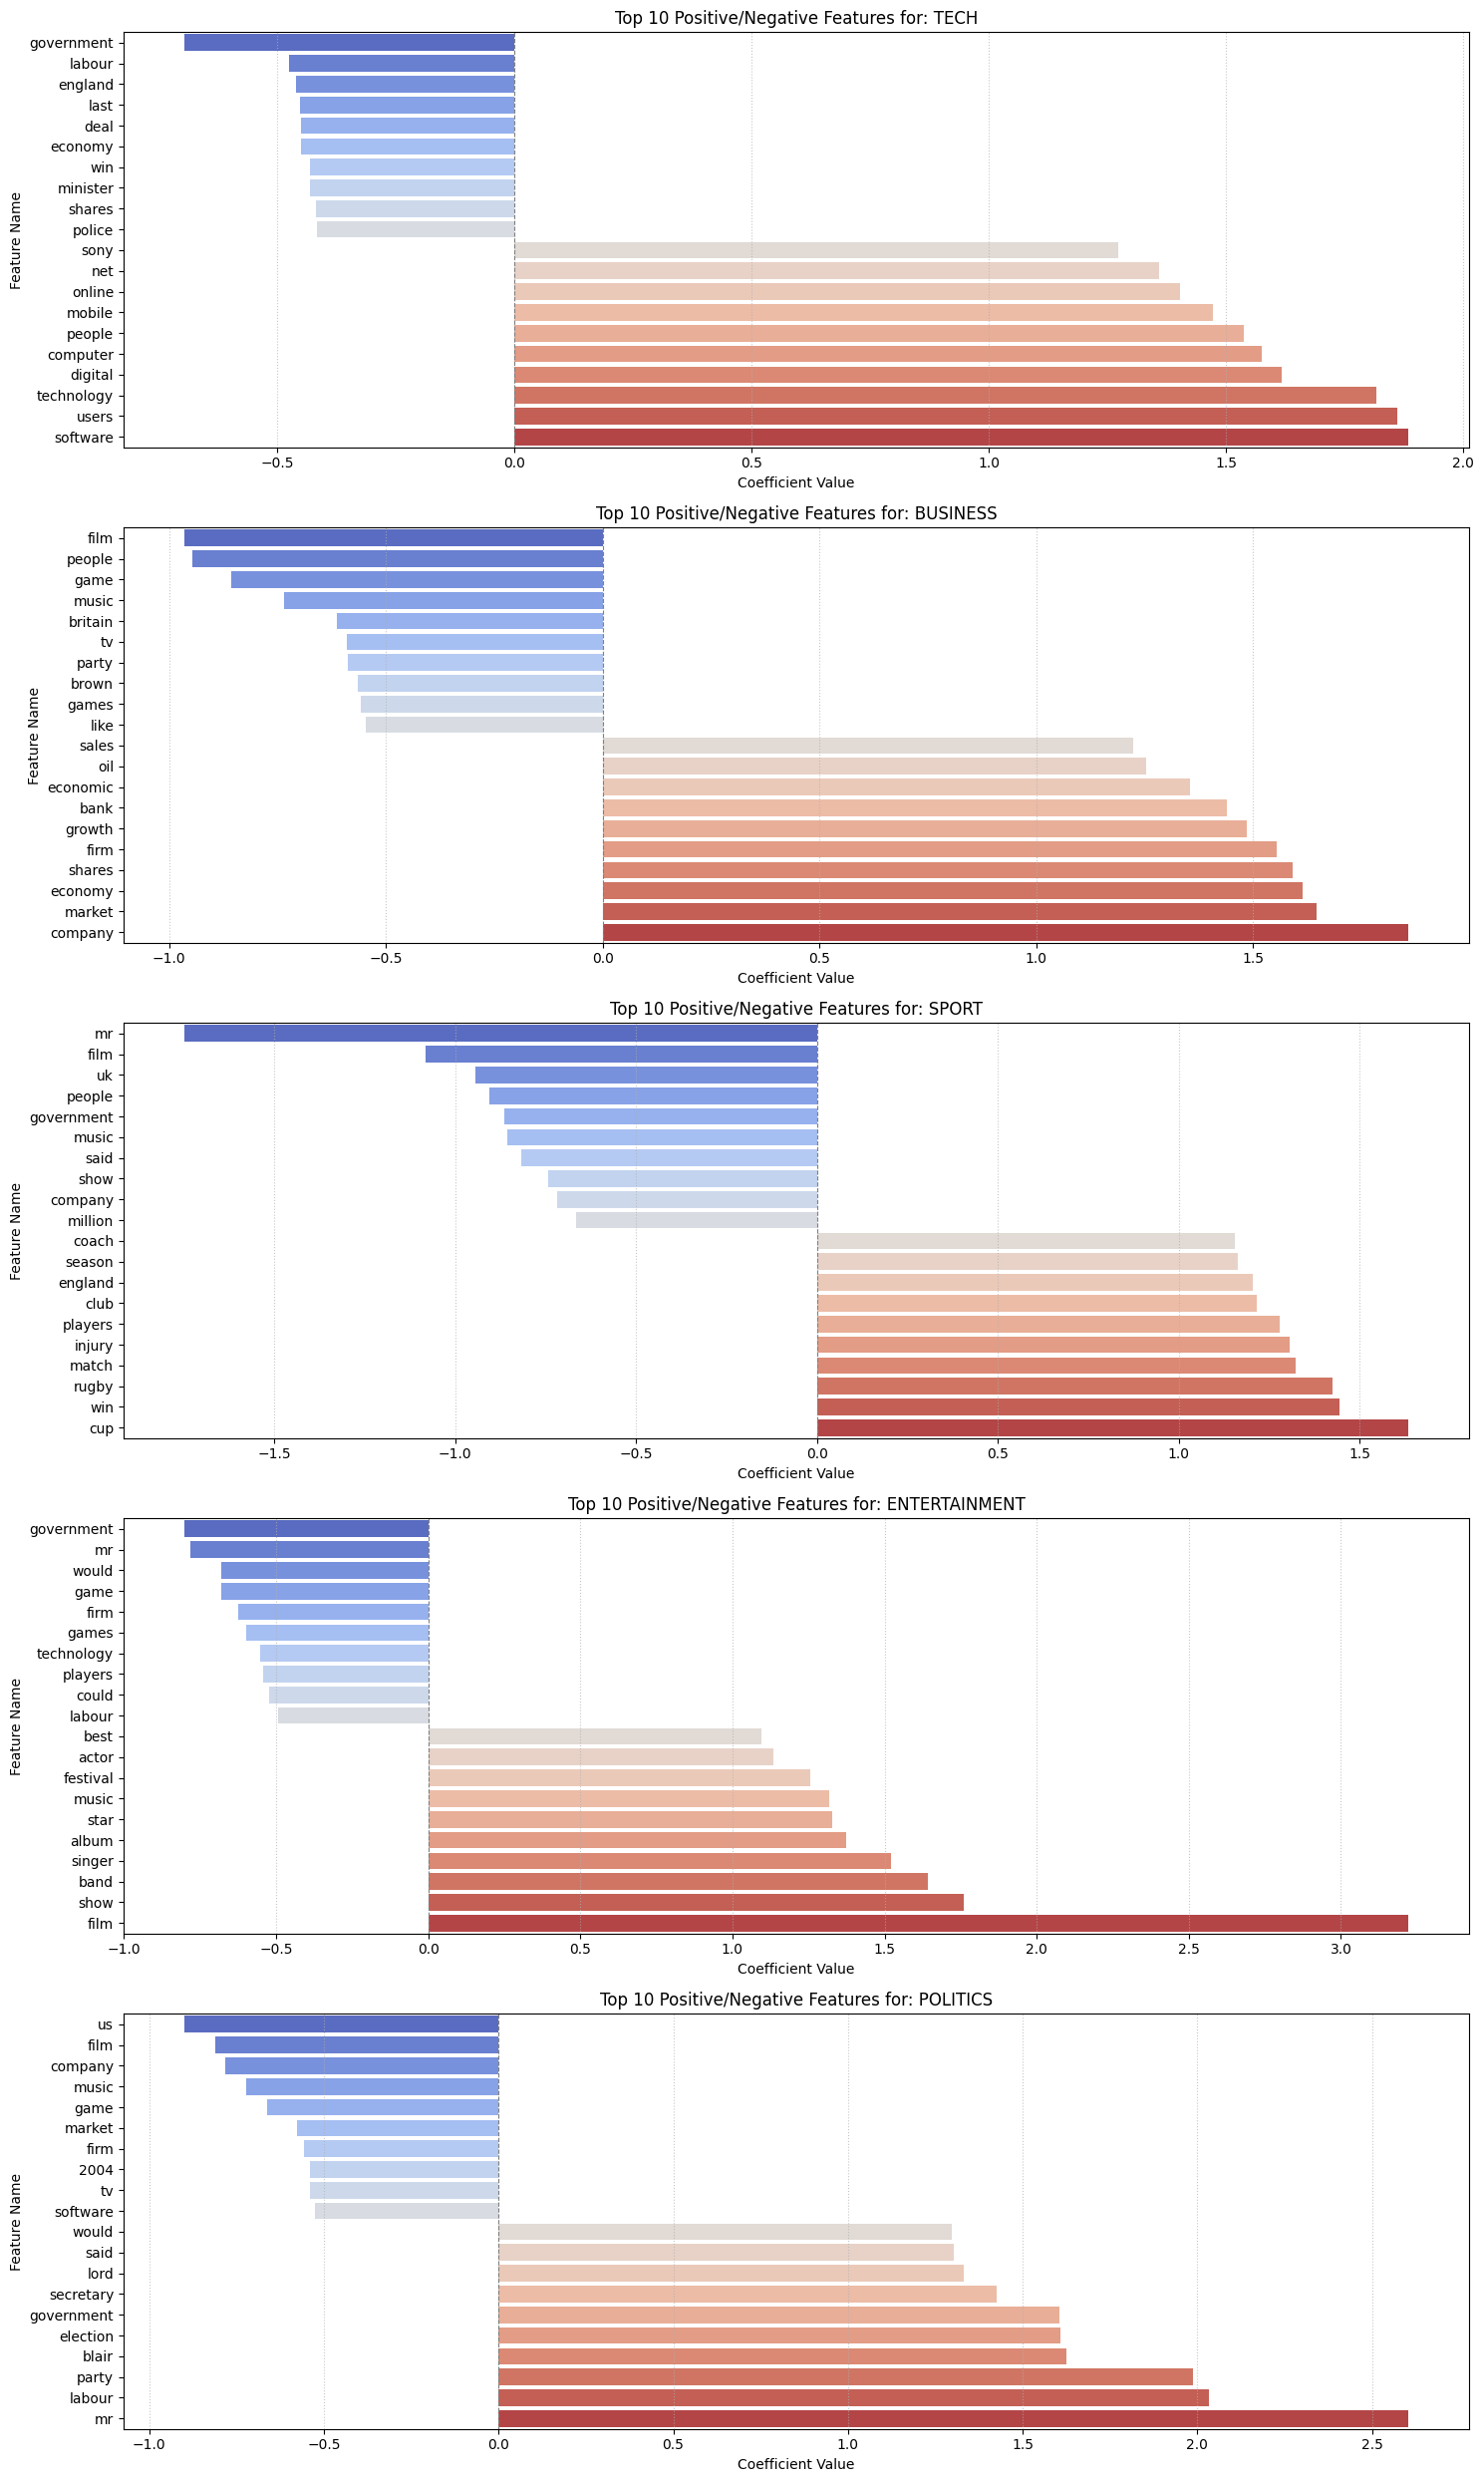

New visualization complete. These charts show the most influential words for and against each news category.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure tfidf_vectorizer, log_reg_model, and df are available from previous cells

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients for each class from the Logistic Regression model
# log_reg_model.coef_ has shape (num_classes, num_features)
coefs = log_reg_model.coef_

# Get class names for plotting (ordered by numerical label)
label_mapping = df[['label', 'label_text']].drop_duplicates().sort_values('label')
class_names = label_mapping['label_text'].tolist()

num_top_features = 10 # Number of top positive and negative features to display per category

print("Generating Diverging Bar Charts for Top Features per Category...")

plt.figure(figsize=(15, 5 * len(class_names))) # Adjust figure size dynamically

for i, class_name in enumerate(class_names):
    # Get coefficients for the current class
    class_coefs = coefs[i]

    # Create a Series for easy sorting and mapping with feature names
    feature_importance = pd.Series(class_coefs, index=feature_names)

    # Get top positive and top negative features
    top_positive = feature_importance.nlargest(num_top_features)
    top_negative = feature_importance.nsmallest(num_top_features)

    # Combine and sort for plotting
    plot_data = pd.concat([top_negative, top_positive])
    plot_data = plot_data.sort_values(ascending=True)

    plt.subplot(len(class_names), 1, i + 1)
    sns.barplot(x=plot_data.values, y=plot_data.index, palette='coolwarm')
    plt.title(f'Top {num_top_features} Positive/Negative Features for: {class_name.upper()}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nNew visualization complete. These charts show the most influential words for and against each news category.")
